# Biweekly Report 2 - Breast Cancer Classification

From previous classes we learned linear models for classification, whose loss function is baiscally the cross-entropy. Here I am going to use a linear model for classifying digitized images of breast cancer. The dataset I use is Breast Cancer Wisconsin (Diagnostic) from UCI: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic and I simply import it from sklearn. It is a binary classification task. 

In [1]:
import torch
import torch.nn as nn
from torch.optim import Optimizer
import numpy as np
import matplotlib.pyplot as plt


First let's take a look at the data. 

In [2]:
# Load in the dataset
from sklearn.datasets import load_breast_cancer


In [3]:
# Load the data
data = load_breast_cancer()

In [4]:
# Check the type of data
type(data)

sklearn.utils._bunch.Bunch

It's a bunch type. This basically act like a dictionary where you can treat the keys like attributes. Take a look below. 

In [5]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Let's take a look at the shape of data so we can know the input dimension. It is 30 here. 

In [6]:
# data (the attribute) means input data
data.data.shape
# It has 569 samples and 30 features

(569, 30)

Now let's look at the targets.   
Since it is a binary classification task, the targets are just 0s and 1s. Normally, when you have K targets, they are labeled 0...(K-1). 

In [7]:
# Targets
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

We can also get the meanings of the targets. They are "malignant" and "benign" in this case.

In [8]:
# Their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

There are also 569 corresponding targets.

In [9]:
data.target.shape

(569,)

Also, we can get the meaning of each feature. And you can now infer that we have 30 of them.

In [10]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Now let's start processing the data. First split them into training set and testing set. 

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into train and test
x_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.40)
N,D = x_train.shape


In [12]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(X_test)


Now build the model. Since I am doing this with Pytorch, it is very simple. I use a linear layer, whose output dimension is 1 because it is a binary classification, followed by a sigmoid layer, which is the activation function. 

In [13]:
# Build the model
model = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)

For loss function, I choose BCE, a criterion that measures the Binary Cross Entropy between the target and the input probabilities. The fomula is: $$ l_n = -w_n[y_n \cdot log(x_n) + (1 - y_n) \cdot log(1 - x_n)] $$
You can find more information here: https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss.   
  
For optimization method (solver), I choose Adam. Though it is not covered in class, I found it quite useful and seemed to perform better than SGD in this case. You can get detailed information on it here: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html#adam.

In [14]:
# Loss and Optimizer
criterion = nn.BCELoss()
Optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [15]:
# Convert data into torch tensor
x_train = torch.from_numpy(x_train.astype(np.float32))
x_test = torch.from_numpy(x_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32).reshape(-1, 1))
y_test = torch.from_numpy(y_test.astype(np.float32).reshape(-1, 1))

Now we have gone through data processing and model construction. It is time for training! 

In [16]:
# Train the model
n_epochs = 100

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losess = np.zeros(n_epochs)

for it in range(n_epochs):
  # Zero the parameter gradients
  Optimizer.zero_grad()

  # Forward pass
  outputs = model(x_train)
  loss = criterion(outputs,y_train)

# Forward pass
  outputs = model(x_train)
  loss = criterion(outputs,y_train)

# Backward and Optimize
  loss.backward()
  Optimizer.step()

 # Get test loss
  outputs_test = model(x_test)
  loss_test = criterion(outputs_test, y_test)


# Save losses
  train_losses[it] = loss.item()
  test_losess[it] = loss_test.item()


  print(f'Epoch {it+1}/{n_epochs},Train Loss: {loss.item():.4f},Test Loss: {loss.item()}')


Epoch 1/100,Train Loss: 1.1371,Test Loss: 1.137107014656067
Epoch 2/100,Train Loss: 1.0366,Test Loss: 1.0365676879882812
Epoch 3/100,Train Loss: 0.9427,Test Loss: 0.9427438378334045
Epoch 4/100,Train Loss: 0.8559,Test Loss: 0.8559038043022156
Epoch 5/100,Train Loss: 0.7765,Test Loss: 0.7764803767204285
Epoch 6/100,Train Loss: 0.7048,Test Loss: 0.7048231959342957
Epoch 7/100,Train Loss: 0.6410,Test Loss: 0.6409729719161987
Epoch 8/100,Train Loss: 0.5846,Test Loss: 0.5846303701400757
Epoch 9/100,Train Loss: 0.5352,Test Loss: 0.535243034362793
Epoch 10/100,Train Loss: 0.4921,Test Loss: 0.49212461709976196
Epoch 11/100,Train Loss: 0.4545,Test Loss: 0.4545474648475647
Epoch 12/100,Train Loss: 0.4218,Test Loss: 0.4218006432056427
Epoch 13/100,Train Loss: 0.3932,Test Loss: 0.3932238817214966
Epoch 14/100,Train Loss: 0.3682,Test Loss: 0.3682246804237366
Epoch 15/100,Train Loss: 0.3463,Test Loss: 0.3462833762168884
Epoch 16/100,Train Loss: 0.3270,Test Loss: 0.3269515335559845
Epoch 17/100,Train

The below plot shows the change in loss during training. 

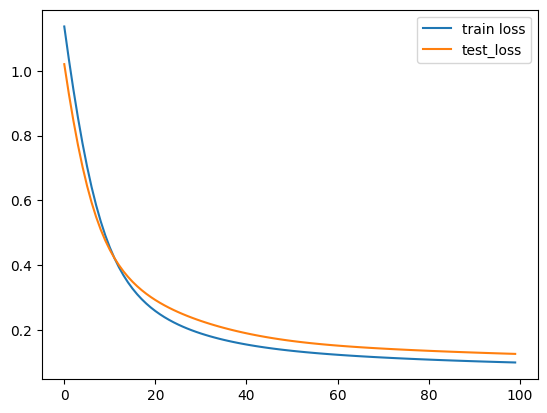

In [17]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses,label='train loss')
plt.plot(test_losess, label = 'test_loss')
plt.legend()
plt.show()


Now calculate the accuracy. 

In [18]:
# Get accuracy
with torch.no_grad():
  p_train = model(x_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(x_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)

  print(f'Train acc: {train_acc: .4f},Test acc: {test_acc: .4f}')

Train acc:  0.9736,Test acc:  0.9693


Save and load the model here. 

In [19]:
# look at the state dict
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.2586, -0.2912, -0.4623, -0.3502, -0.3449, -0.2665, -0.1900, -0.3102,
                       -0.1451,  0.6761, -0.3946,  0.0753, -0.4419, -0.3157, -0.0562, -0.0844,
                       -0.0127, -0.2102,  0.3534,  0.2629, -0.2923, -0.3944, -0.2110, -0.2069,
                       -0.2421, -0.2114, -0.2359, -0.2848, -0.4954, -0.2246]])),
             ('0.bias', tensor([0.4958]))])

In [20]:
# Save the model
torch.save(model.state_dict(), 'myfirstmodel.pt')

In [21]:
# Load the model
# Note : this makes more sense and is more compact when your model is a big class, as we will be seeing later.
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

model2.load_state_dict(torch.load('myfirstmodel.pt'))

<All keys matched successfully>

Now evaluate the model and see the performance. 

In [22]:
# Evaluate the new model
# Result should be the same since we use the same data and the model hyperparameters are not changed
with torch.no_grad():
  p_train = model2(x_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model2(x_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)



print(f'Train acc: {train_acc: .4f}, Test acc: {test_acc: .4f}')


Train acc:  0.9736, Test acc:  0.9693
